In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [31]:
df = pd.read_csv('AAPL.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2022-09-12,2022-09-12,159.589996,164.259995,159.300003,163.429993,162.466171,104956000
2022-09-13,2022-09-13,159.899994,160.539993,153.369995,153.839996,152.932739,122656600
2022-09-14,2022-09-14,154.789993,157.100006,153.610001,155.309998,154.394073,87965400
2022-09-15,2022-09-15,154.649994,155.240005,151.380005,152.369995,151.471420,90481100
2022-09-16,2022-09-16,151.210007,151.350006,148.369995,150.699997,149.811264,162278800


In [32]:
df = df.loc[:,['Close']]
df

,Close
2022-09-12,163.429993
2022-09-13,153.839996
2022-09-14,155.309998
2022-09-15,152.369995
2022-09-16,150.699997
...,...
2023-09-01,189.460007
2023-09-05,189.699997
2023-09-06,182.910004
2023-09-07,177.559998


In [33]:
df['Actual_Returns'] = df['Close'].pct_change() #Calculates the rate of change from the previous day sales
df
df = df.dropna()

In [34]:
def shortEma(data):
    return data['Close'].ewm(span=5, adjust=False).mean()

def middleEma(data):
    return data['Close'].ewm(span=21, adjust=False).mean()

def longEma(data):
    return data['Close'].ewm(span=63, adjust=False).mean()

In [35]:
df['Short'] = shortEma(df).copy()
df['Middle'] = middleEma(df).copy()
df['Long'] = longEma(df).copy()


C:\Users\rsurs\AppData\Local\Temp\ipykernel_14632\3931947694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Short'] = shortEma(df).copy()
C:\Users\rsurs\AppData\Local\Temp\ipykernel_14632\3931947694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Middle'] = middleEma(df).copy()
C:\Users\rsurs\AppData\Local\Temp\ipykernel_14632\3931947694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [36]:
df = df.dropna()
df

,Close,Actual_Returns,Short,Middle,Long
2022-09-13,153.839996,-0.058680,153.839996,153.839996,153.839996
2022-09-14,155.309998,0.009555,154.329997,153.973633,153.885934
2022-09-15,152.369995,-0.018930,153.676663,153.827847,153.838560
2022-09-16,150.699997,-0.010960,152.684441,153.543497,153.740480
2022-09-19,154.479996,0.025083,153.282959,153.628634,153.763590
...,...,...,...,...,...
2023-09-01,189.460007,0.008463,186.168330,182.863099,182.226592
2023-09-05,189.699997,0.001267,187.345552,183.484635,182.460136
2023-09-06,182.910004,-0.035793,185.867036,183.432396,182.474195
2023-09-07,177.559998,-0.029249,183.098023,182.898541,182.320626


In [37]:
def buy_sell_function(data):
    buy_list, sell_list = [np.nan] * len(data), [np.nan] * len(data)
    flag_long, flag_short = False, False

    for i in range(0, len(data)):
        if (
            data['Short'][i] > data['Middle'][i] and
            data['Middle'][i] > data['Long'][i] and
            flag_long is False and flag_short is False
        ):
            buy_list[i] = data['Close'][i]
            sell_list[i] = np.nan
            flag_long = True
        elif flag_long and data['Short'][i] < data['Middle'][i]:
            sell_list[i] = data['Close'][i]
            buy_list[i] = np.nan
            flag_long = False
        if (
            data['Short'][i] < data['Middle'][i] and
            data['Middle'][i] < data['Long'][i] and
            flag_long is False and flag_short is False
        ):
            buy_list[i] = data['Close'][i]
            sell_list[i] = np.nan
            flag_short = True
        elif flag_short and data['Short'][i] > data['Middle'][i]:
            sell_list[i] = data['Close'][i]
            buy_list[i] = np.nan
            flag_short = False
    return buy_list, sell_list

df['Buy'],df['Sell'] = buy_sell_function(df)

In [38]:
df.head()

,Close,Actual_Returns,Short,Middle,Long,Buy,Sell
2022-09-13,153.839996,-0.058680,153.839996,153.839996,153.839996,NaN,NaN
2022-09-14,155.309998,0.009555,154.329997,153.973633,153.885934,155.309998,NaN
2022-09-15,152.369995,-0.018930,153.676663,153.827847,153.838560,152.369995,NaN
2022-09-16,150.699997,-0.010960,152.684441,153.543497,153.740480,NaN,NaN
2022-09-19,154.479996,0.025083,153.282959,153.628634,153.763590,NaN,NaN


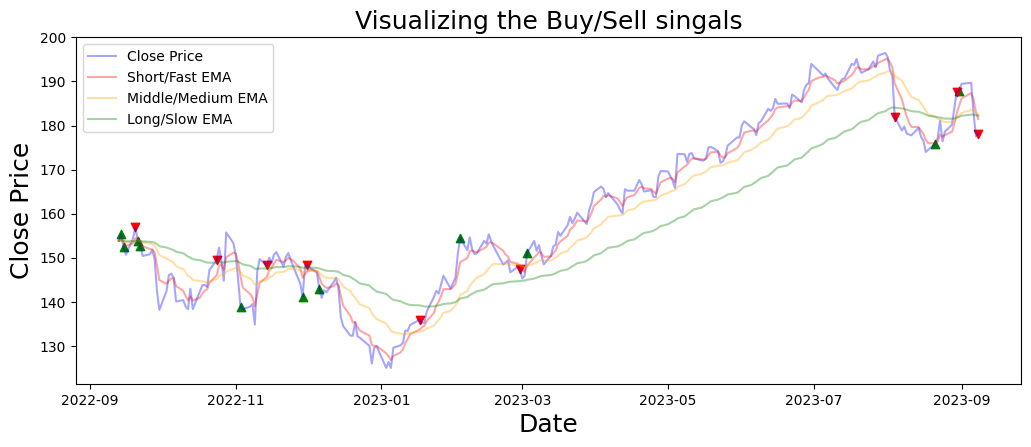

In [39]:
plt.figure(figsize=(12.2, 4.5))
plt.title('Visualizing the Buy/Sell singals', fontsize=18)
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.35)
plt.plot(df['Short'], label='Short/Fast EMA', color='red', alpha=0.35)
plt.plot(df['Middle'], label='Middle/Medium EMA', color='orange', alpha=0.35)
plt.plot(df['Long'], label='Long/Slow EMA', color='green', alpha=0.35)
plt.scatter(df.index, df['Buy'], color='green', marker='^', alpha=1)
plt.scatter(df.index, df['Sell'], color='red', marker='v', alpha=1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()

Setting the target for the dependent variable (y) 

In [40]:
df['Signal'] = 0
#When the actual returns are greater than or equal 0,generate to buy signal
df.loc[(df['Actual_Returns'] >= 0),'Signal'] = 1
df.loc[(df['Actual_Returns'] < 0),'Signal'] = 0
df.head()

,Close,Actual_Returns,Short,Middle,Long,Buy,Sell,Signal
2022-09-13,153.839996,-0.058680,153.839996,153.839996,153.839996,NaN,NaN,0
2022-09-14,155.309998,0.009555,154.329997,153.973633,153.885934,155.309998,NaN,1
2022-09-15,152.369995,-0.018930,153.676663,153.827847,153.838560,152.369995,NaN,0
2022-09-16,150.699997,-0.010960,152.684441,153.543497,153.740480,NaN,NaN,0
2022-09-19,154.479996,0.025083,153.282959,153.628634,153.763590,NaN,NaN,1


In [41]:
df['Strategy_Returns'] = df['Actual_Returns']*df['Signal'].shift()
df

,Close,Actual_Returns,Short,Middle,Long,Buy,Sell,Signal,Strategy_Returns
2022-09-13,153.839996,-0.058680,153.839996,153.839996,153.839996,NaN,NaN,0,NaN
2022-09-14,155.309998,0.009555,154.329997,153.973633,153.885934,155.309998,NaN,1,0.000000
2022-09-15,152.369995,-0.018930,153.676663,153.827847,153.838560,152.369995,NaN,0,-0.018930
2022-09-16,150.699997,-0.010960,152.684441,153.543497,153.740480,NaN,NaN,0,-0.000000
2022-09-19,154.479996,0.025083,153.282959,153.628634,153.763590,NaN,NaN,1,0.000000
...,...,...,...,...,...,...,...,...,...
2023-09-01,189.460007,0.008463,186.168330,182.863099,182.226592,NaN,NaN,1,0.008463
2023-09-05,189.699997,0.001267,187.345552,183.484635,182.460136,NaN,NaN,1,0.001267
2023-09-06,182.910004,-0.035793,185.867036,183.432396,182.474195,NaN,NaN,0,-0.035793
2023-09-07,177.559998,-0.029249,183.098023,182.898541,182.320626,NaN,NaN,0,-0.000000


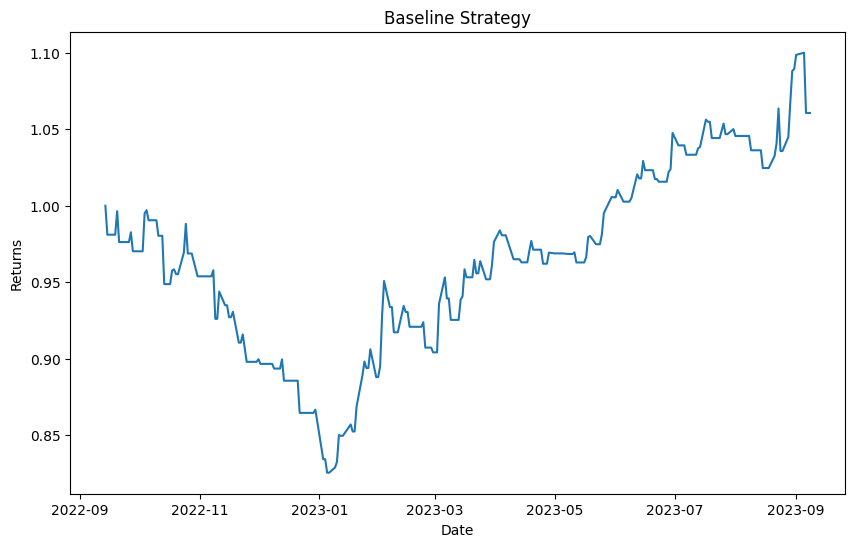

In [42]:
cumulative_returns = (1 + df['Strategy_Returns']).cumprod()
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, cumulative_returns)
ax.set_title('Baseline Strategy')
ax.set_xlabel('Date')
ax.set_ylabel('Returns')
plt.show()

In [43]:
x = df[['Short','Middle','Long']].shift().dropna()
x.head()
x

,Short,Middle,Long
2022-09-14,153.839996,153.839996,153.839996
2022-09-15,154.329997,153.973633,153.885934
2022-09-16,153.676663,153.827847,153.838560
2022-09-19,152.684441,153.543497,153.740480
2022-09-20,153.282959,153.628634,153.763590
...,...,...,...
2023-09-01,184.522491,182.203408,181.993256
2023-09-05,186.168330,182.863099,182.226592
2023-09-06,187.345552,183.484635,182.460136
2023-09-07,185.867036,183.432396,182.474195


In [44]:
y = df['Signal']
y = y.drop(y.index[0])
y

2022-09-14    1
2022-09-15    0
2022-09-16    0
2022-09-19    1
2022-09-20    1
             ..
2023-09-01    1
2023-09-05    1
2023-09-06    0
2023-09-07    0
2023-09-08    1
Name: Signal, Length: 248, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y)
x_test_indexes = x_test.index
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [47]:
pred_df = pd.DataFrame(index=x_test_indexes)
pred_df['Model_Predictions'] = y_pred 
pred_df['Actual_Returns'] = df['Actual_Returns']
pred_df['Strategy_Returns'] = pred_df['Actual_Returns'] * pred_df['Model_Predictions']
pred_df

,Model_Predictions,Actual_Returns,Strategy_Returns
2023-06-20,0,0.000487,0.000000
2023-05-25,1,0.006692,0.006692
2023-08-01,0,-0.004276,-0.000000
2022-10-13,1,0.033613,0.033613
2022-09-23,1,-0.015124,-0.015124
...,...,...,...
2023-06-29,0,0.001797,0.000000
2022-12-13,1,0.006782,0.006782
2023-09-08,0,0.003492,0.000000
2023-04-18,1,0.007505,0.007505


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.38      0.20      0.26        30
           1       0.48      0.69      0.56        32

    accuracy                           0.45        62
   macro avg       0.43      0.44      0.41        62
weighted avg       0.43      0.45      0.42        62



In [ ]:
pca = PCA(n_components=2)
x_train_reduced = pca.fit_transform(x_train)
x_test_reduced = pca.fit_transform(x_test)
model = LogisticRegression()
model.fit(x_train_reduced,y_train)
y_pred = model.predict(x_test_reduced)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.56      0.30      0.39        30
           1       0.54      0.78      0.64        32

    accuracy                           0.55        62
   macro avg       0.55      0.54      0.52        62
weighted avg       0.55      0.55      0.52        62



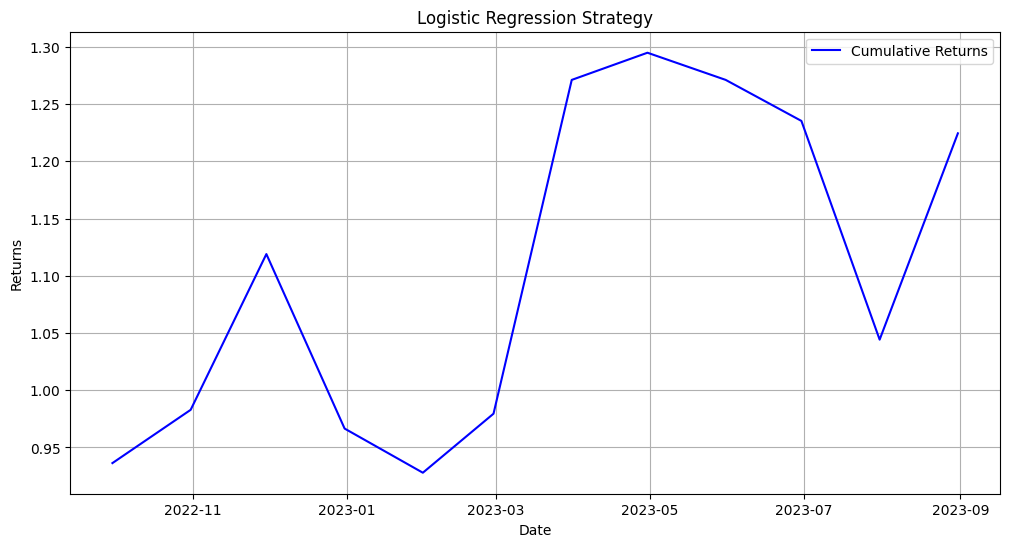

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming pred_df is your DataFrame with the 'Strategy Returns' column
# Set the frequency for resampling, for example, 'M' for monthly
resample_frequency = 'M'

# Calculate the cumulative returns
cumulative_returns = (1 + pred_df['Strategy_Returns']).cumprod()

# Resample the data based on the chosen frequency (e.g., monthly)
cumulative_returns_resampled = cumulative_returns.resample(resample_frequency).last()

# Create a Matplotlib figure and plot the resampled data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(cumulative_returns_resampled.index, cumulative_returns_resampled, label='Cumulative Returns', color='blue')
ax.set_title('Logistic Regression Strategy')
ax.set_xlabel('Date')
ax.set_ylabel('Returns')
ax.grid(True)
plt.legend()
plt.show()


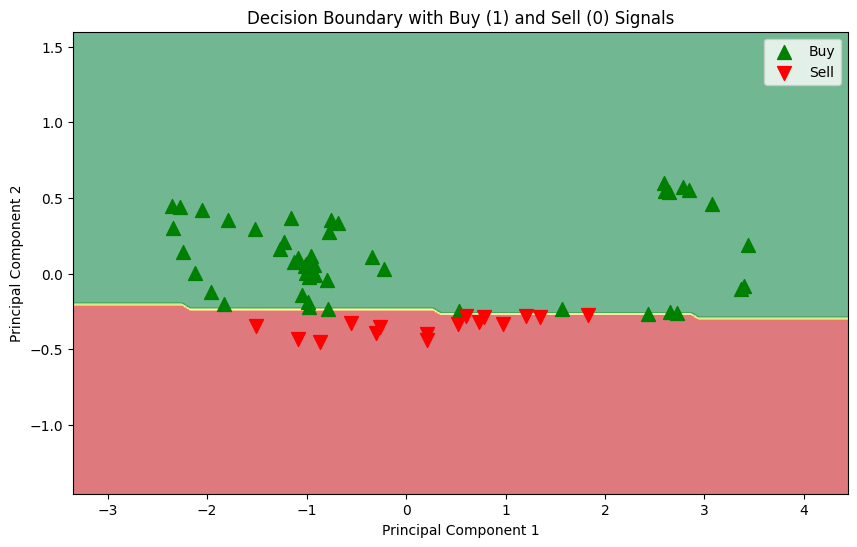

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Assuming you have PCA-reduced data: x_train_reduced, x_test_reduced, and the model 'model'

# Create a mesh grid for visualization
xx, yy = np.meshgrid(np.linspace(x_test_reduced[:, 0].min()-1, x_test_reduced[:, 0].max()+1, 100),
                     np.linspace(x_test_reduced[:, 1].min()-1, x_test_reduced[:, 1].max()+1, 100))

# Create a mesh of points for prediction
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Use the model to predict the decision boundary (0 or 1) for each point in the mesh
boundary_predictions = model.predict(mesh_points)

# Reshape the predictions to match the shape of the mesh grid
boundary_predictions = boundary_predictions.reshape(xx.shape)

# Create a scatter plot to visualize the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, boundary_predictions, cmap=plt.cm.RdYlGn, alpha=0.6)

# Overlay the actual buy (1) and sell (0) signals from 'pred_df["Signal"]'
buy_points = x_test_reduced[pred_df['Model_Predictions'] == 1]
sell_points = x_test_reduced[pred_df['Model_Predictions'] == 0]

plt.scatter(buy_points[:, 0], buy_points[:, 1], c='green', label='Buy', marker='^', s=100)
plt.scatter(sell_points[:, 0], sell_points[:, 1], c='red', label='Sell', marker='v', s=100)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary with Buy (1) and Sell (0) Signals')
plt.legend()
plt.show()


In [53]:
from sklearn.svm import SVC
clf_svm = SVC(kernel='rbf')
clf_svm.fit(x_train_reduced,y_train)
y_pred = clf_svm.predict(x_test_reduced)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.41      0.23      0.30        30
           1       0.49      0.69      0.57        32

    accuracy                           0.47        62
   macro avg       0.45      0.46      0.43        62
weighted avg       0.45      0.47      0.44        62



In [55]:
pred_df = pd.DataFrame(index=x_test_indexes)
pred_df['Model_Predictions'] = y_pred 
pred_df['Actual_Returns'] = df['Actual_Returns']
pred_df['Strategy_Returns'] = pred_df['Actual_Returns'] * pred_df['Model_Predictions']
pred_df

,Model_Predictions,Actual_Returns,Strategy_Returns
2023-06-20,0,0.000487,0.000000
2023-05-25,1,0.006692,0.006692
2023-08-01,1,-0.004276,-0.004276
2022-10-13,1,0.033613,0.033613
2022-09-23,1,-0.015124,-0.015124
...,...,...,...
2023-06-29,1,0.001797,0.001797
2022-12-13,1,0.006782,0.006782
2023-09-08,1,0.003492,0.003492
2023-04-18,1,0.007505,0.007505


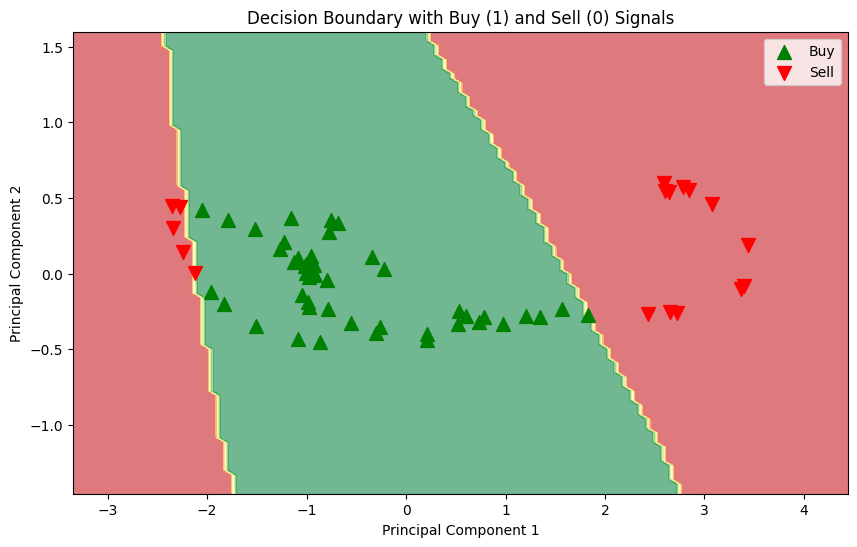

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Assuming you have a PCA-reduced dataset 'x_test_reduced' and a trained SVM model 'clf_svm'

# Create a meshgrid for visualization
xx, yy = np.meshgrid(np.linspace(x_test_reduced[:, 0].min()-1, x_test_reduced[:, 0].max()+1, 100),
                     np.linspace(x_test_reduced[:, 1].min()-1, x_test_reduced[:, 1].max()+1, 100))

# Create a mesh of points for prediction
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Use the SVM model to predict the decision boundary (0 or 1) for each point in the mesh
boundary_predictions = clf_svm.predict(mesh_points)

# Reshape the predictions to match the shape of the mesh grid
boundary_predictions = boundary_predictions.reshape(xx.shape)

# Create a scatter plot to visualize the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, boundary_predictions, cmap=plt.cm.RdYlGn, alpha=0.6)

# Overlay the actual buy (1) and sell (0) signals from 'pred_df["Model_Predictions"]'
buy_points = x_test_reduced[pred_df['Model_Predictions'] == 1]
sell_points = x_test_reduced[pred_df['Model_Predictions'] == 0]

plt.scatter(buy_points[:, 0], buy_points[:, 1], c='green', label='Buy', marker='^', s=100)
plt.scatter(sell_points[:, 0], sell_points[:, 1], c='red', label='Sell', marker='v', s=100)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundary with Buy (1) and Sell (0) Signals')
plt.legend()
plt.show()


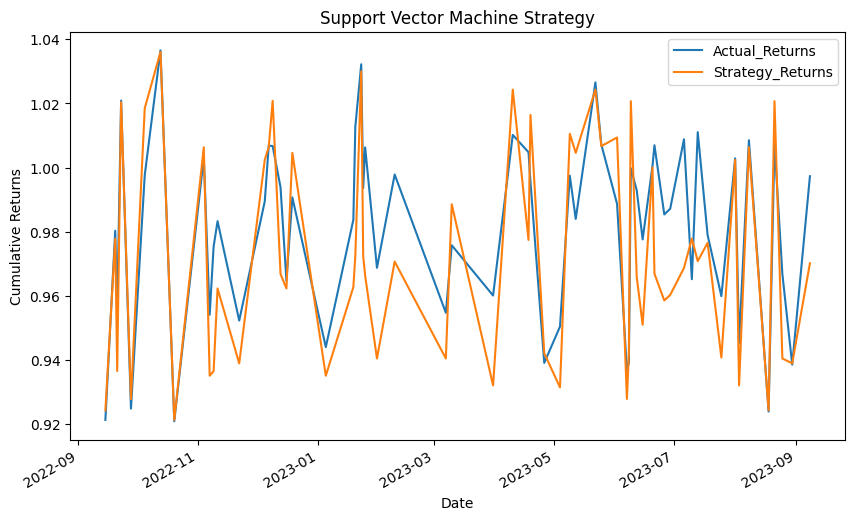

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'predictions_df' is your DataFrame

# Calculate the cumulative product
cumulative_returns = (1 + pred_df[['Actual_Returns', 'Strategy_Returns']]).cumprod()

# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
cumulative_returns.plot(ax=ax, title='Support Vector Machine Strategy')

# Add labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')
plt.legend(['Actual_Returns', 'Strategy_Returns'])

# Show the plot
plt.show()
